<a href="https://colab.research.google.com/github/EmelyanovAndreyNSK/PythonTasks/blob/master/MstatLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 
from scipy.stats import gamma
import random
import math

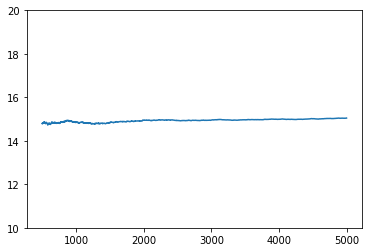

In [8]:
# 1
N = 5000
k, Q = 10., 1.5
s = np.random.gamma(k, Q, N)

for i in range(1,N):
  s[i] = s[i] + s[i - 1]
for i in range(1,N):
  s[i] = s[i]/i  

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim([10, 20])

plt.plot(range(500,5000), s[500:5000])
plt.show()

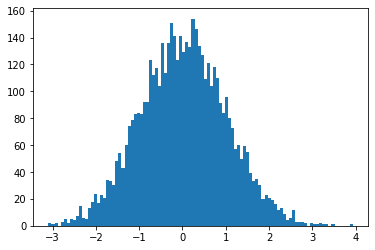

In [20]:
# 2
from scipy.stats import norm
%matplotlib inline

numbers_in_formula = list()
 
for i in range(N):
  random_numbers = list()
  for i in range(N):
    random_numbers.append(np.random.gamma(k, Q))
 
  expected_value = k*Q
  variance = k*Q*Q
  numbers_in_formula.append((sum(random_numbers) 
  - N * expected_value) / math.sqrt(N * variance))

fig = plt.figure()
ax = fig.add_subplot(111) 

x_axis = np.arange(0, N - 1)

plt.hist(numbers_in_formula, bins=100, density=False)
plt.show()

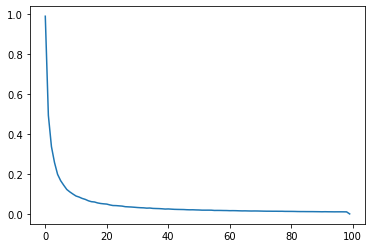

In [27]:
%matplotlib inline

def Poisson(Lambda, num_events):  
  inter_event_time = np.zeros(num_events)
  for i in range(num_events):
    #Get the next probability value from Uniform(0,1)
    p = random.random()
    #Plug it into the inverse of the CDF of Exponential(Lambda)
    inter_event_time[i] = -math.log(1.0 - p)/Lambda  
  return inter_event_time  

def ExpectedTime(Lmbd):
  N = 5000
  time_lambda = 0
  j = 0
  while (j < N):
    temp = Poisson(Lmbd,2)
    if(temp[0]<=1):
      time_lambda += temp[1]
      j += 1
  return time_lambda / N

Lmax = 100
interval = 1
expected_time = np.zeros(int(round(Lmax / interval)))

L = interval
i = 0
while (L < Lmax):
  expected_time[i] = ExpectedTime(L)
  L += interval
  i += 1

fig = plt.figure()
ax = fig.add_subplot(111) 

plt.plot(expected_time)
plt.show()
